<a href="https://colab.research.google.com/github/tanishpophale53/Analysis-and-Classification-of-Online-learning-of-students-according-to-Flexibility-Level/blob/main/Analysis_of_Online_learning_of_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

Importing Dataset


In [6]:
data = pd.read_csv('/content/online_education.csv')

Printing first five rows of the dataset

In [7]:
data.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


Printing last five rows of the dataset

In [8]:
data.tail()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low
1204,School,Private,Female,11,Mobile,No,Town,Poor,Mobile Data,3G,Moderate


Printing Dimension of Dataset

In [9]:
data.shape

(1205, 11)

Printing all the columns of a dataset

In [10]:
data.columns

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')

In [11]:
data.duplicated().sum()

980

Printing the null values of a particular column of a Dataset

In [12]:
data.isnull().sum()

Education Level        0
Institution Type       0
Gender                 0
Age                    0
Device                 0
IT Student             0
Location               0
Financial Condition    0
Internet Type          0
Network Type           0
Flexibility Level      0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


Short Description of Dataset

In [14]:
data.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


Pandas nunique() is used to get a count of unique values. 

In [15]:
data.nunique()

Education Level        3
Institution Type       2
Gender                 2
Age                    6
Device                 3
IT Student             2
Location               2
Financial Condition    3
Internet Type          2
Network Type           3
Flexibility Level      3
dtype: int64

Plotting the Histogram plot for each column of a dataset.

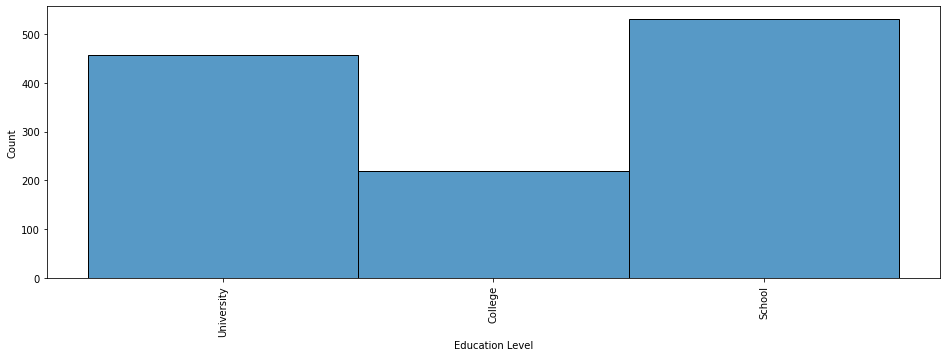

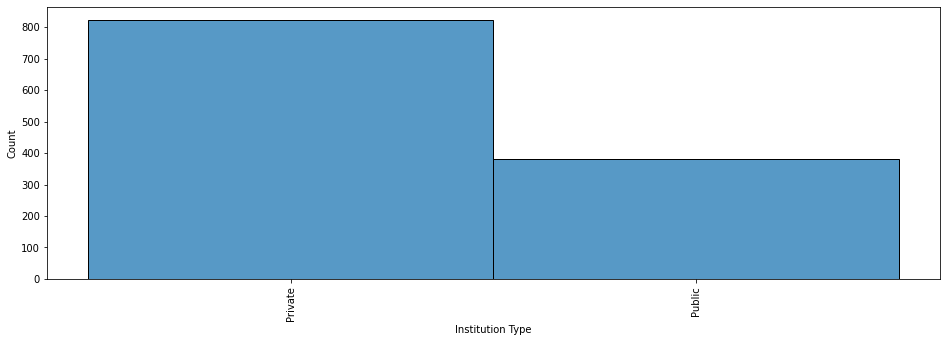

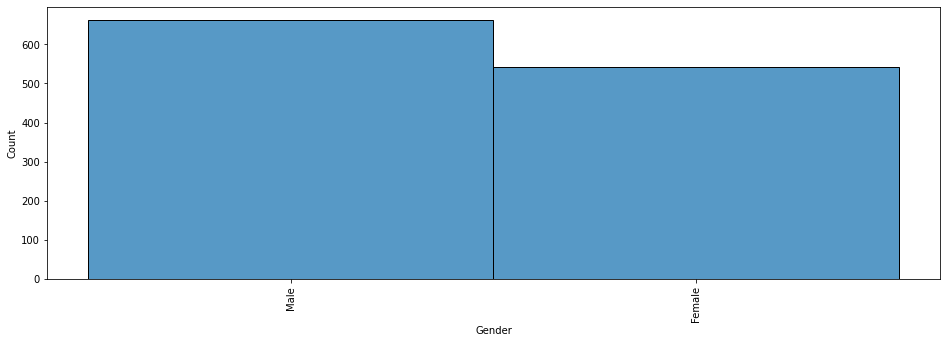

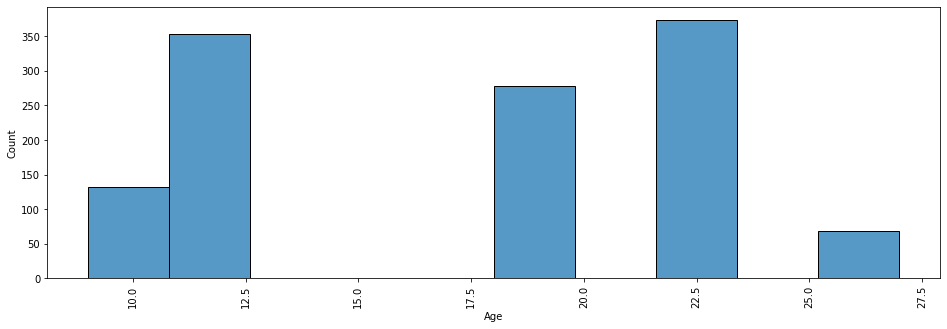

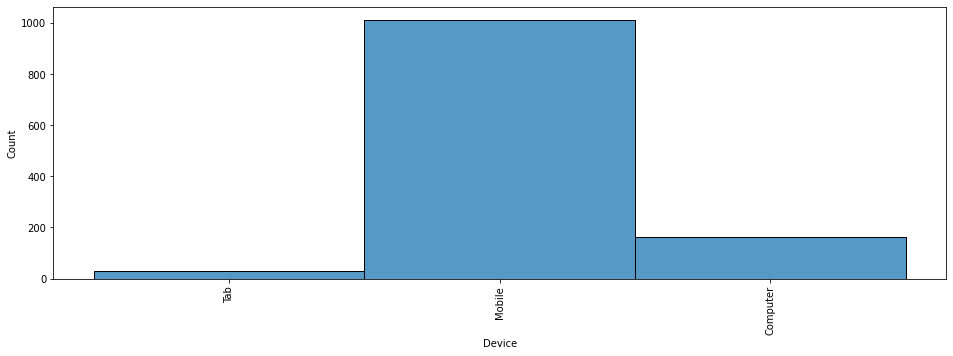

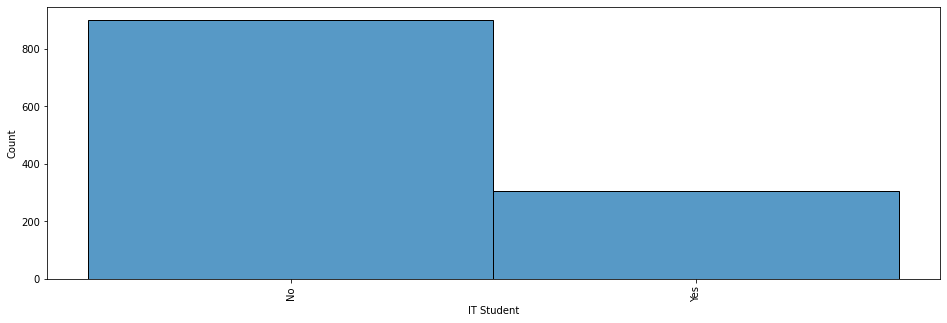

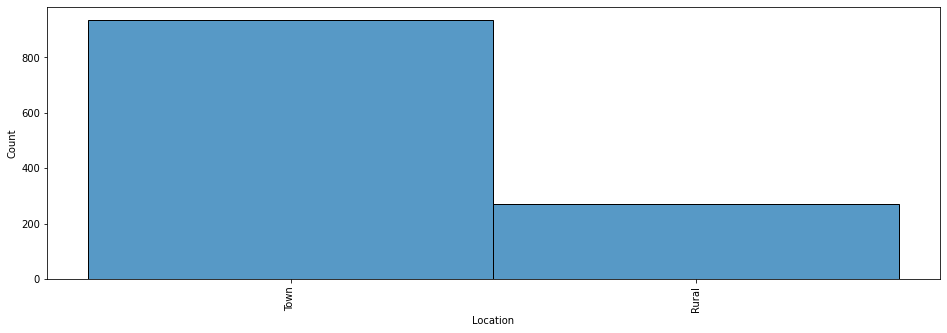

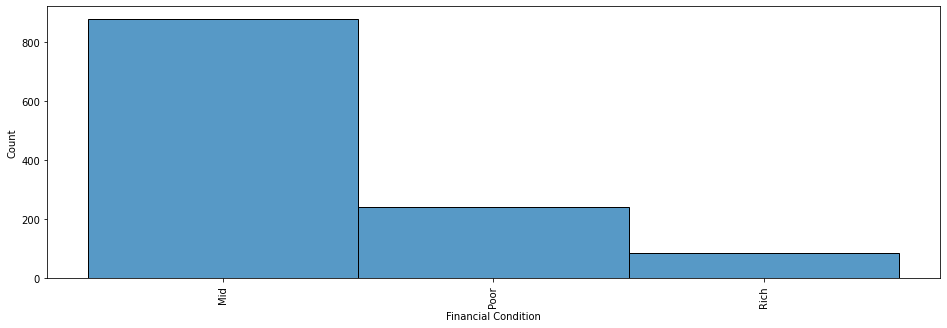

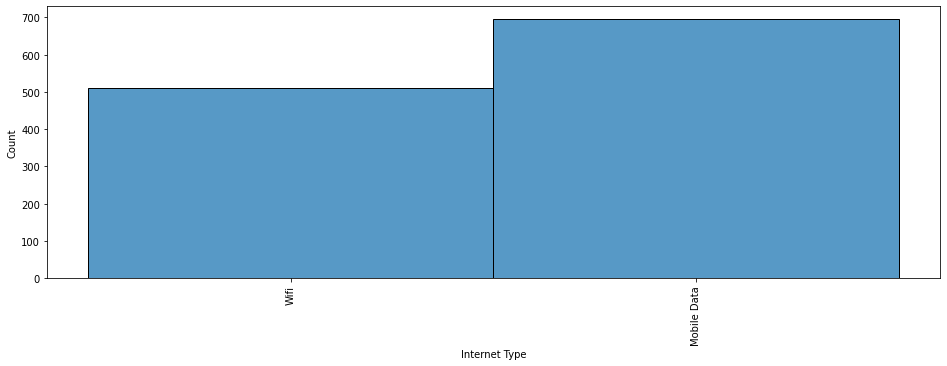

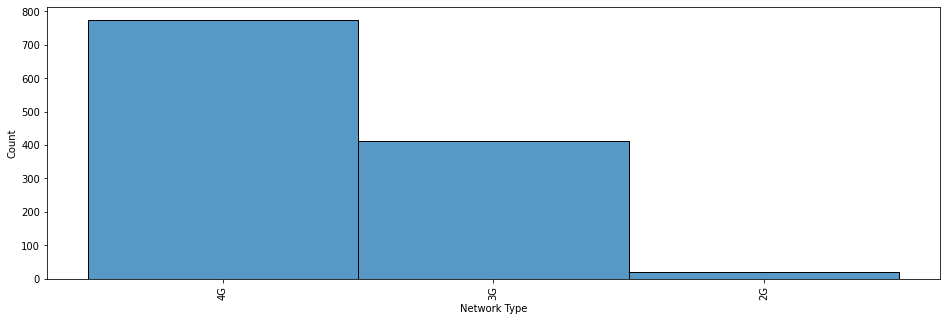

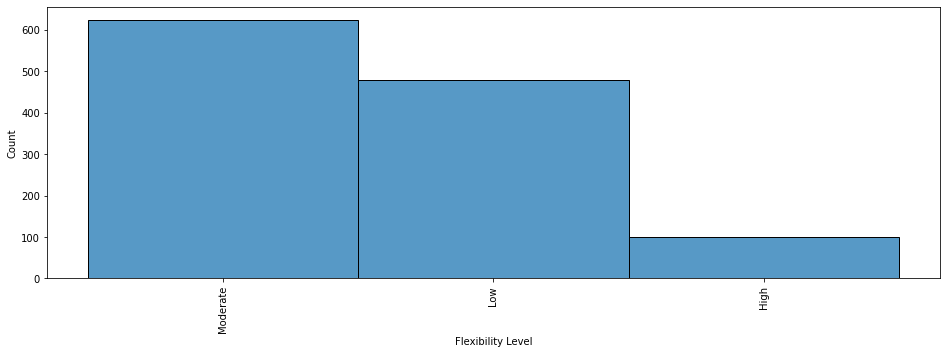

In [16]:
for i in data.columns:
  plt.figure(figsize=(16,5))
  sns.histplot( data[i], bins = 10)
  plt.xticks(rotation = 90)
  plt.show()

Plotting count plot for each value of a particular column of a dataset.

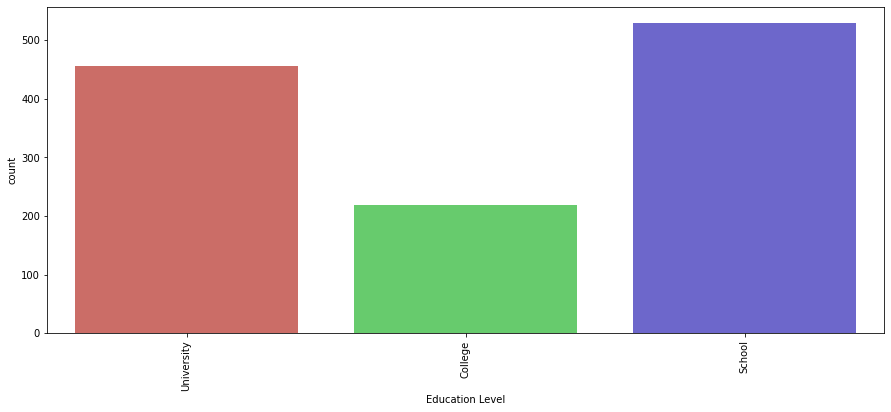

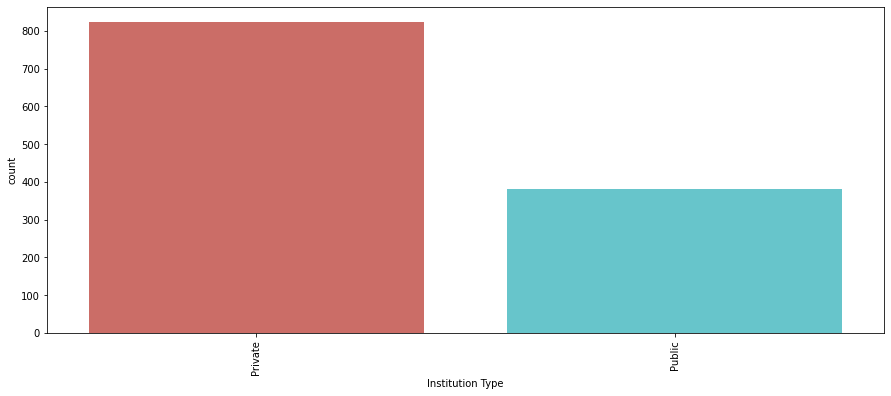

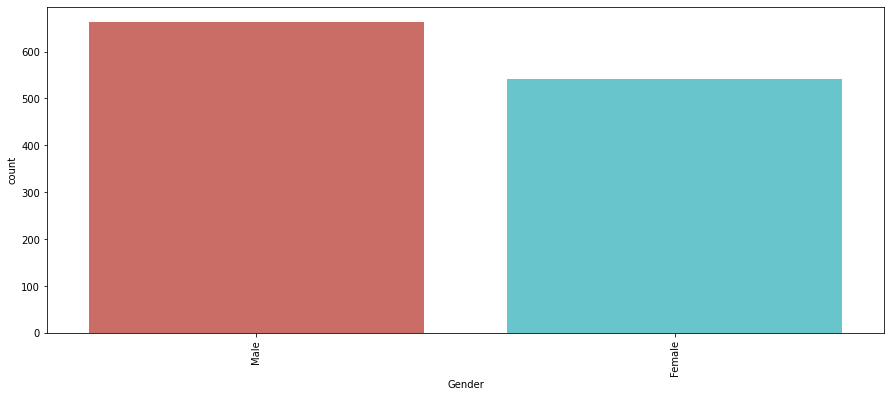

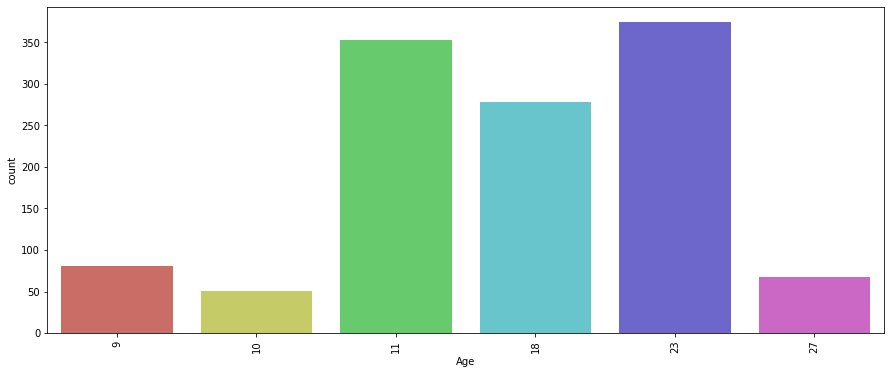

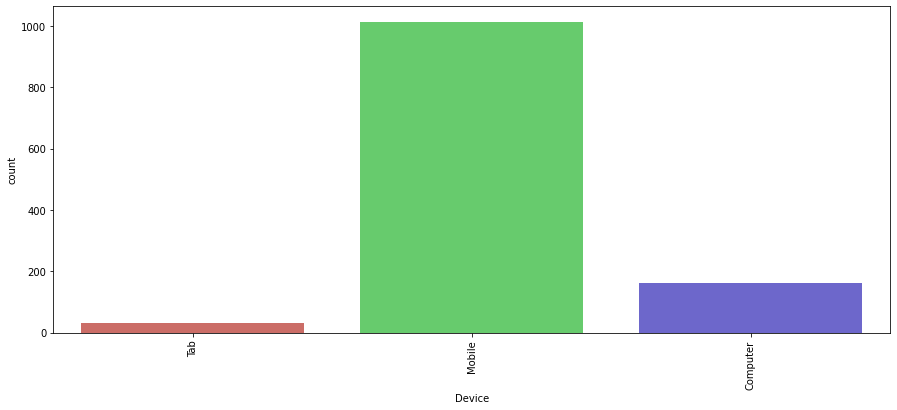

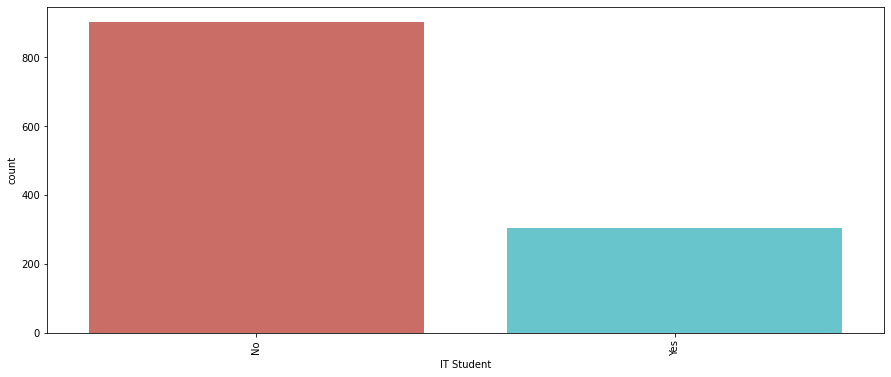

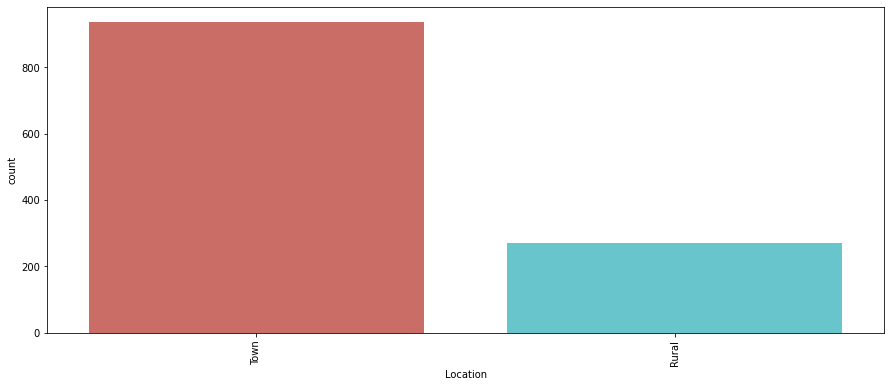

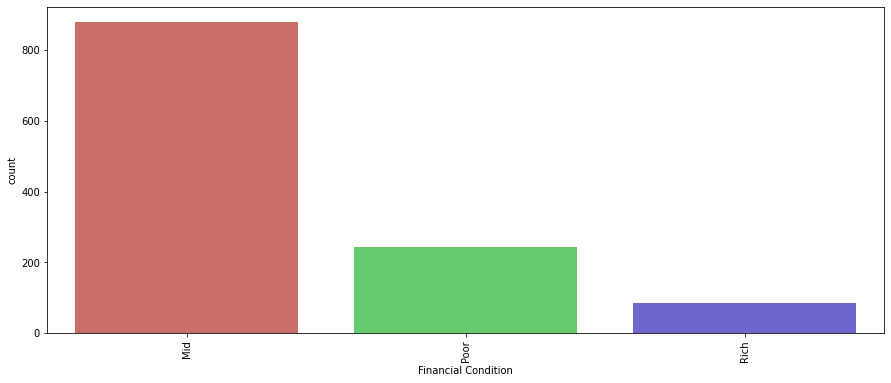

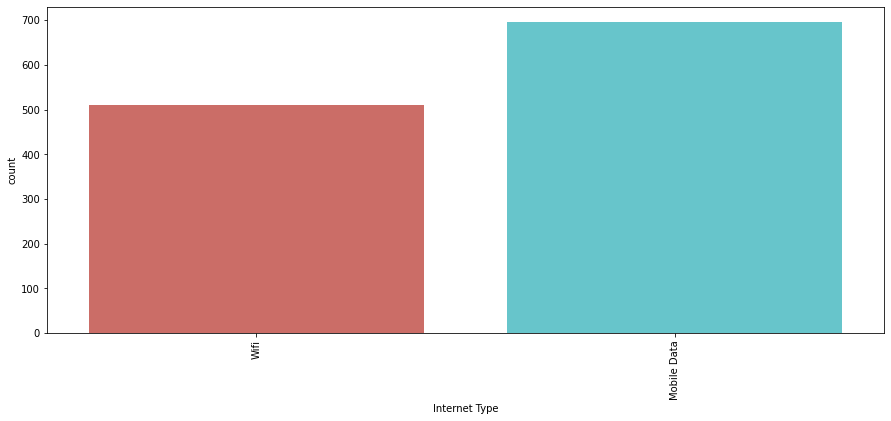

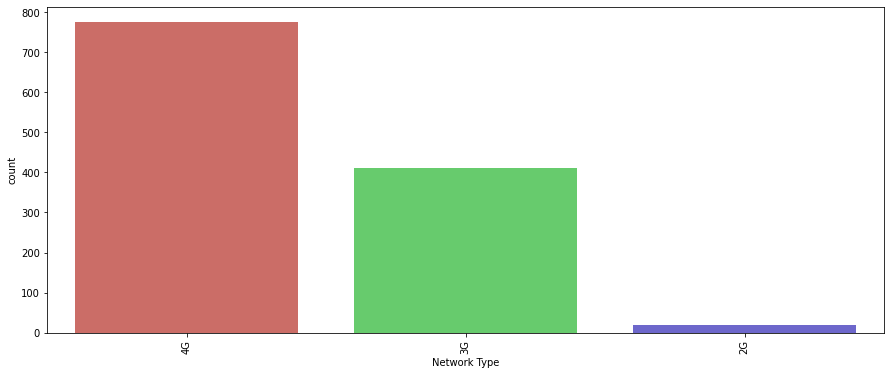

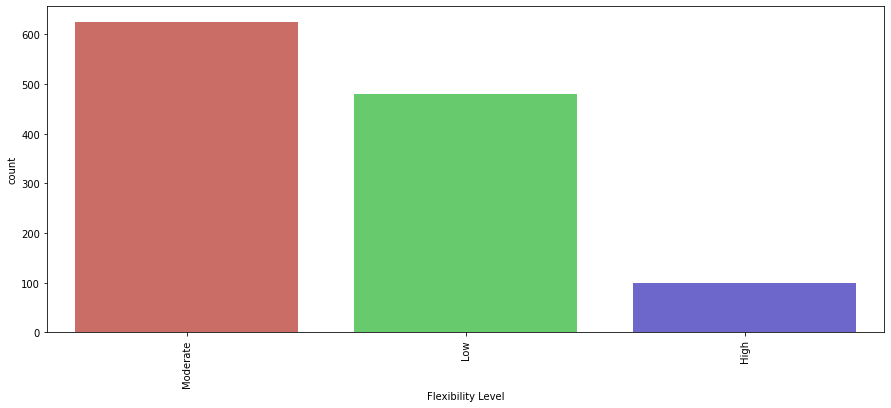

In [17]:
for i in data.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(data[i], data = data, palette = 'hls')
  plt.xticks(rotation = 90)
  plt.show()

Plotting the Distribution graph/plot for the 'Age' column of a dataset

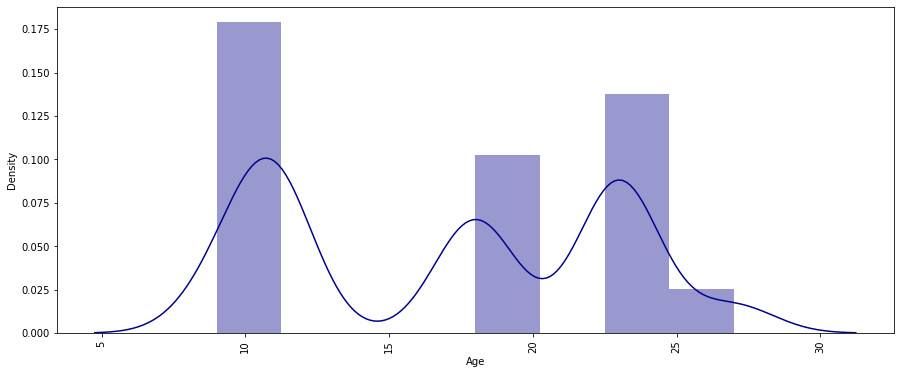

In [18]:
plt.figure(figsize=(15,6))
sns.distplot(data['Age'], kde= True, color = 'Darkblue')
plt.xticks(rotation = 90)
plt.show()

Plotting the histogram and KDE plot in one figure of 'Age' column of a dataset

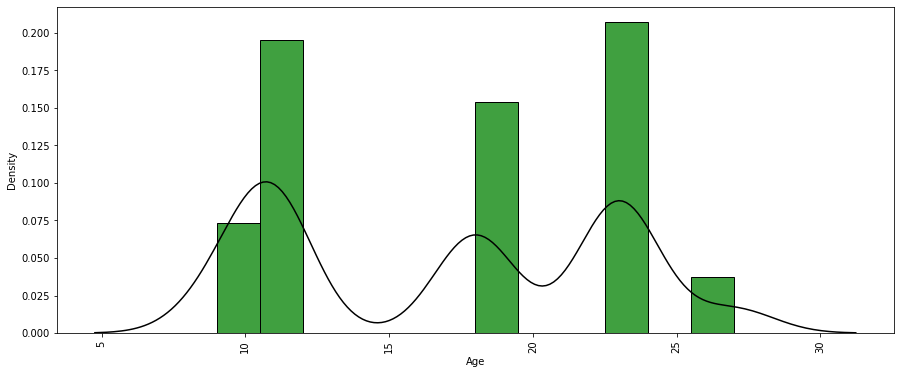

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(data['Age'], stat = 'density', color= 'green')
sns.kdeplot(data['Age'], color='black')
plt.xticks(rotation = 90)
plt.show()

Taking the log of 'Age' column of a dataset and Plotting Histogram & KDE Plot of 'Age' column of a dataset

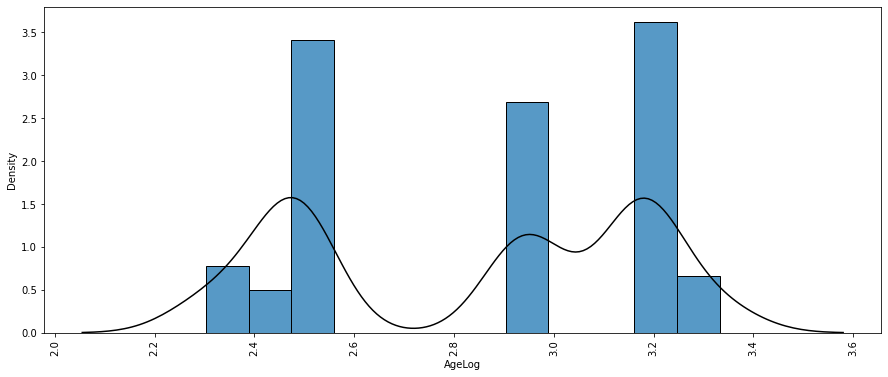

In [20]:
plt.figure(figsize=(15,6))
data['AgeLog']= np.log(data['Age']+1)
sns.histplot(data['AgeLog'], stat = 'density')
sns.kdeplot(data['AgeLog'], color = 'black')
plt.xticks(rotation = 90)
plt.show()

Plotting Box Plot of 'Age' column of a dataset

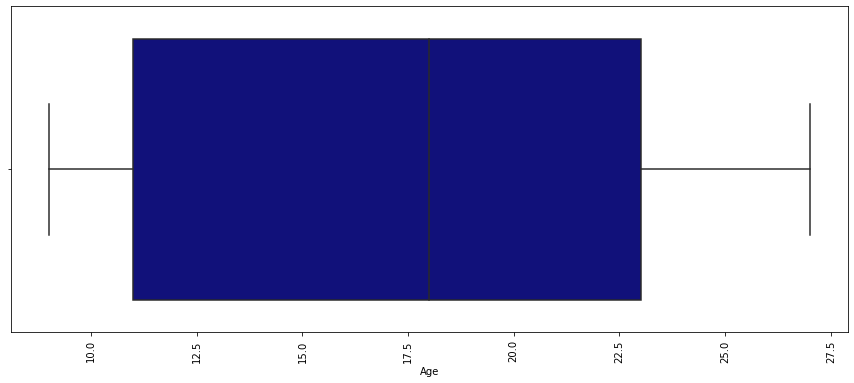

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(data['Age'], color = 'Darkblue')
plt.xticks(rotation = 90)
plt.show()

Preprocessing of dataset using Sklearn Library

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
FlexibilityLevel = le.fit_transform(data['Flexibility Level'])
data['Flexibility Level'] = FlexibilityLevel


In [24]:
categorical_features = ['Education Level','Gender','Institution Type',
'Device','IT Student','Location',
'Financial Condition','Internet Type',
'Network Type']


PLotting the Sub & Bar Plot

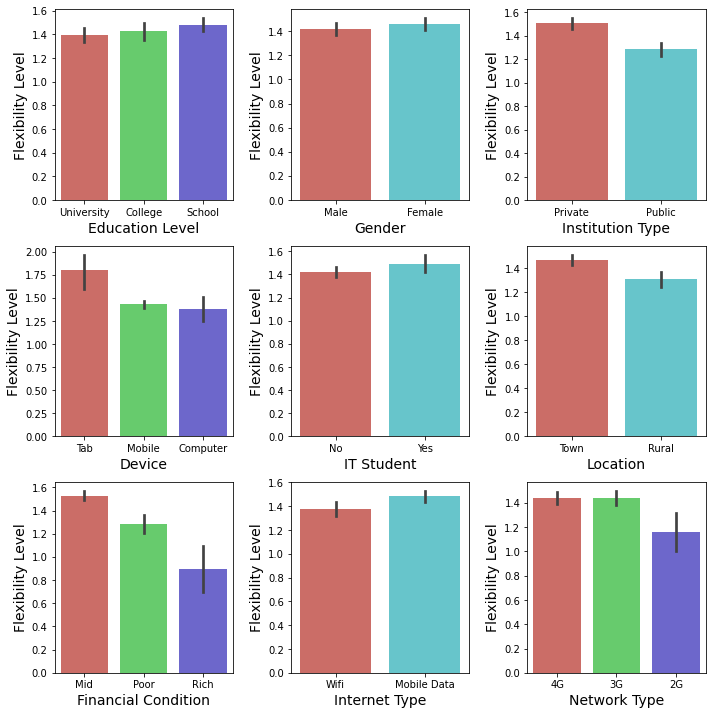

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
axes = [ax for axes_row in axes for ax in axes_row]
target =  'Flexibility Level'

for i,c in enumerate(categorical_features):
  sns.barplot(data[c], data[target], ax=axes[i], palette = 'hls')
  axes[i].set_ylabel('Flexibility Level', fontsize=14)
  axes[i].set_xlabel(c, fontsize=14)

plt.tight_layout()
plt.show()

In [26]:
EducationLevel= le.fit_transform(data['Education Level'])
Gender = le.fit_transform(data['Gender'])
InstitutionType = le.fit_transform(data['Institution Type'])
Device = le.fit_transform(data['Device'])
ITStudent= le.fit_transform(data['IT Student'])
Location = le.fit_transform(data['Location'])
FinancialCondition = le.fit_transform(data['Financial Condition'])
InternetType = le.fit_transform(data['Internet Type'])
NetworkType = le.fit_transform(data['Network Type'])


In [27]:
data['Education Level'] = EducationLevel
data['Gender'] = Gender
data['Institution Type'] = InstitutionType
data['Device'] = Device
data['IT Student'] = ITStudent
data['Location'] = Location
data['Financial Condition'] = FinancialCondition
data['Internet Type'] = InternetType
data['Network Type'] = NetworkType


Printing the first 5 rows of our updated preprocessed dataset

In [28]:
data.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level,AgeLog
0,2,0,1,23,2,0,1,0,1,2,2,3.178054
1,2,0,0,23,1,0,1,0,0,2,2,3.178054
2,0,1,0,18,1,0,1,0,1,2,2,2.944439
3,1,0,0,11,1,0,1,0,0,2,2,2.484907
4,1,0,0,18,1,0,1,1,0,1,1,2.944439


Printing the last 5 rows of our updated preprocessed dataset

In [29]:
data.tail()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level,AgeLog
1200,0,0,0,18,1,0,1,0,1,2,1,2.944439
1201,0,0,0,18,1,0,0,0,1,2,2,2.944439
1202,1,0,1,11,1,0,1,0,0,1,2,2.484907
1203,0,0,0,18,1,0,0,0,1,2,1,2.944439
1204,1,0,0,11,1,0,1,1,0,1,2,2.484907


In [30]:
x = data.drop('Flexibility Level', axis=1)
y = data['Flexibility Level']

Printing the shape of updated preprocessed dataset

In [31]:
x.shape

(1205, 11)

In [32]:
y.shape

(1205,)

In [33]:
from sklearn.preprocessing import StandardScaler

Splitting of dataset into train & test

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size= 0.2, random_state = 100)

In [35]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)


Applying XG Boost Algorithm

In [36]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(train_x, train_y)
print(f"Train score={clf.score(train_x, train_y):.3}")
print(f"Test score={clf.score(test_x, test_y):.3}")

y_pred_test = clf.predict(test_x)

Train score=0.759
Test score=0.743


Applying LGB Classifier Algorithm

In [37]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(train_x, train_y)
print(f"Train score={clf.score(train_x, train_y):.7}")
print(f"Test score={clf.score(test_x, test_y):.3}")


clf.score(test_x,test_y)

Train score=0.8350622
Test score=0.846


0.8464730290456431

Applying Gradient Boosting Algorithm

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(train_x,train_y)
gradient_booster.score(test_x,test_y)

0.7842323651452282

Applying Ada Boost Classifier Algorithm

In [39]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=14,learning_rate=0.1)
# Train Adaboost Classifer
model = abc.fit(train_x, train_y)

#Predict the response for test dataset
y_pred = model.predict(test_x)
abc.score(test_x, test_y)

0.5809128630705395

Applying SVM Algorithm

In [40]:
#building model using SVM
from sklearn import svm
from sklearn.svm import SVC
classifier_svm=SVC(kernel="rbf") 
classifier_svm.fit(train_x,train_y)

SVC(C=1.0, cache_size=250, class_weight=None, coef0=0.1, decision_function_shape='ovr', degree=3, gamma='auto_deprecated', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.005, verbose=False)

classifier_svm.score(test_x, test_y)

0.7717842323651453

Applying Decision Tree Classifier Algorithm

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [42]:
y_pred = model.predict(test_x)

In [43]:
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 0.8547717842323651
Testing Accuracy : 0.8547717842323651


In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        23
           1       0.81      0.88      0.84        92
           2       0.90      0.82      0.86       126

    accuracy                           0.85       241
   macro avg       0.84      0.88      0.86       241
weighted avg       0.86      0.85      0.85       241



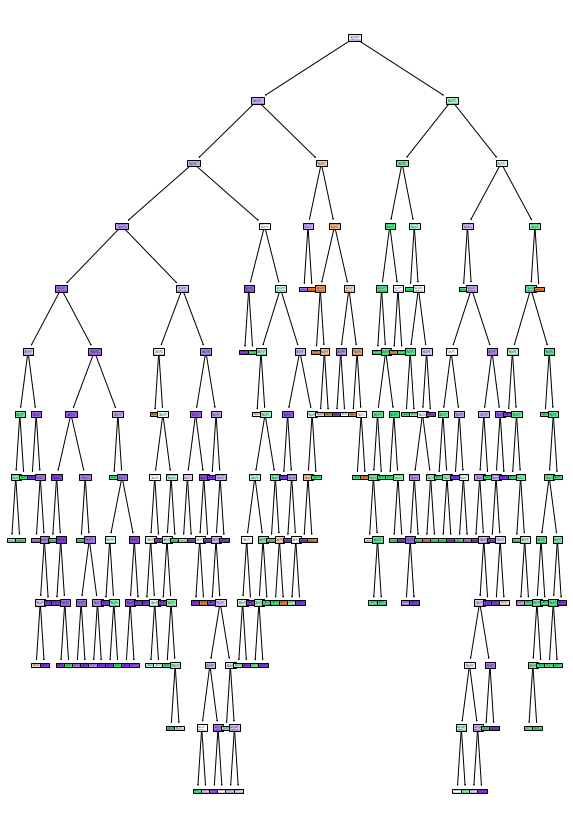

In [46]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(model, filled=True)
plt.show()

In [47]:
model.feature_importances_

array([0.14945317, 0.11257204, 0.11716306, 0.05775113, 0.04112873,
       0.05257178, 0.05906376, 0.13455568, 0.07824259, 0.10827461,
       0.08922346])

Applying Random Forest Classifier Algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10, criterion= 'entropy')

In [49]:
classifier.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [50]:
y_pred = classifier.predict(test_x)

In [51]:
print("Training Accuracy :", classifier.score(train_x, train_y))
print("Testing Accuracy :", classifier.score(test_x, test_y))

Training Accuracy : 0.8526970954356846
Testing Accuracy : 0.8464730290456431


In [52]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.82      0.88      0.85        92
           2       0.89      0.82      0.85       126

    accuracy                           0.85       241
   macro avg       0.83      0.86      0.84       241
weighted avg       0.85      0.85      0.85       241



In [53]:
classifier.feature_importances_

array([0.05918089, 0.09620064, 0.10486635, 0.09055473, 0.05481044,
       0.0610596 , 0.08365364, 0.17926294, 0.09003702, 0.09097999,
       0.08939375])

Text(0.5, 1.03, 'Confusion Matrix for Decision Tree')

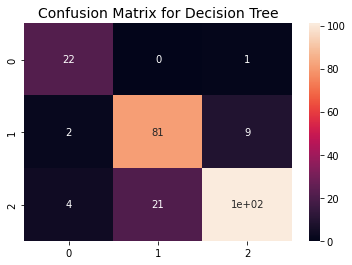

In [54]:
from sklearn.metrics import confusion_matrix
y_pred_clf = clf.predict(test_x)
cf_matrix = confusion_matrix(test_y, y_pred_clf)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree", fontsize=14,
fontname="DejaVu Sans", y=1.03)


So, we got the highest accuracy by Decision Tree Classifier which 85.4